In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [207]:
loan_dataset= pd.read_csv('../data set/dataset1/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data set/dataset1/train.csv'

# Data Exploration and Cleaning

## Exploration

In [161]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [162]:
loan_dataset.shape

(614, 13)

In [163]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [164]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Cleaning

### Missing Values



In [165]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
print(loan_dataset.Credit_History.value_counts())

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [167]:
columns_to_fill = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']

for column in columns_to_fill:
    mode_value = loan_dataset[column].mode().iloc[0]
    loan_dataset[column].fillna(mode_value, inplace=True)

In [168]:
columns_to_fill = ['LoanAmount']

for column in columns_to_fill:
    mean_value = loan_dataset[column].mean()
    loan_dataset[column].fillna(mean_value, inplace=True)

### Outliers

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

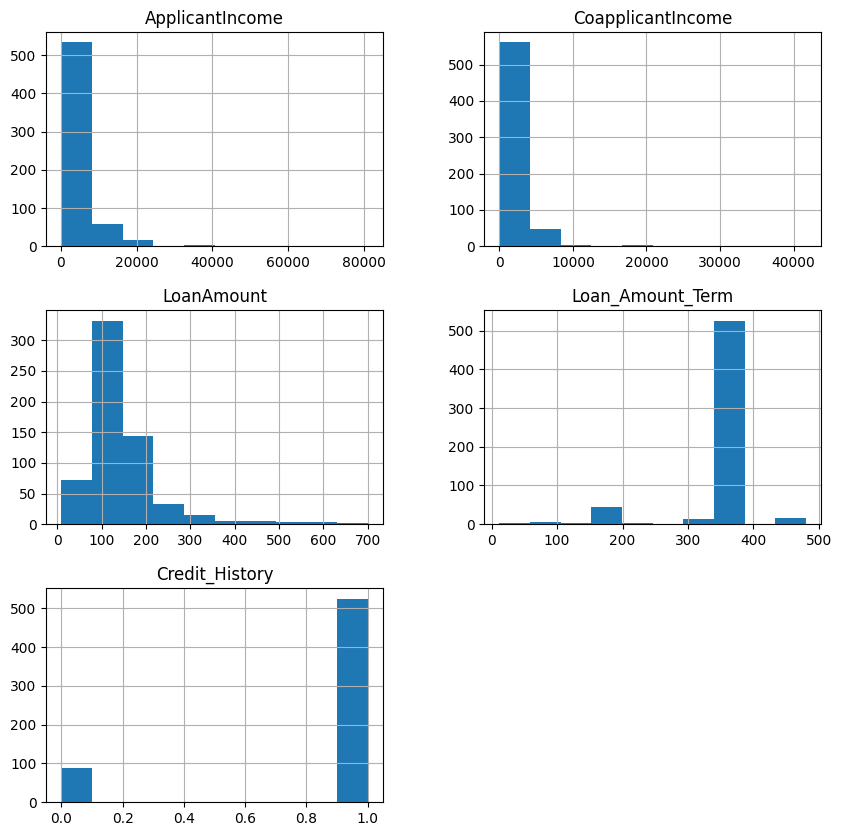

In [169]:
# Boxplots for numerical features
loan_dataset.hist(figsize=(10, 10))


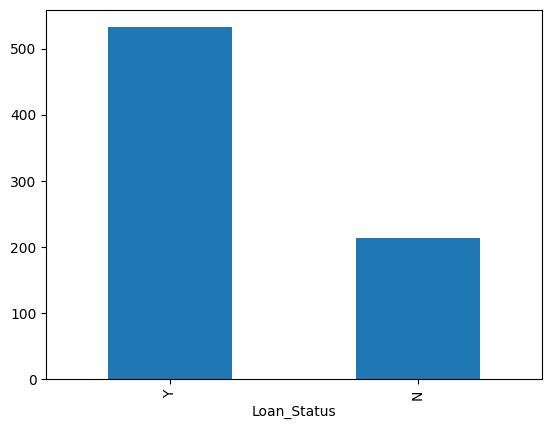

In [170]:
# Bar charts for categorical features
for col in loan_dataset.select_dtypes(include="object"):
    loan_dataset[col].value_counts().plot(kind="bar")


In [171]:
# Isolate potential outliers
outlier_detector = IsolationForest(contamination=0.1)
outlier_labels = outlier_detector.fit_predict(loan_dataset.select_dtypes(exclude="object"))

# Create a new column with outlier flags
loan_dataset["outlier"] = outlier_labels


In [172]:
for col in loan_dataset.select_dtypes(include="object"):
#     print(loan_dataset[col].value_counts(dropna=False))
    print(loan_dataset[col][loan_dataset["outlier"] == 1].value_counts(dropna=False))


Loan_ID
LP001002    1
LP002318    1
LP002296    1
LP002300    1
LP002301    1
           ..
LP001677    1
LP001674    1
LP001673    1
LP001671    1
LP002990    1
Name: count, Length: 552, dtype: int64
Gender
Male      448
Female    104
Name: count, dtype: int64
Married
Yes    359
No     193
Name: count, dtype: int64
Dependents
0     331
2      94
1      85
3+     42
Name: count, dtype: int64
Education
Graduate        431
Not Graduate    121
Name: count, dtype: int64
Self_Employed
No     484
Yes     68
Name: count, dtype: int64
Property_Area
Semiurban    211
Urban        178
Rural        163
Name: count, dtype: int64
Loan_Status
Y    398
N    154
Name: count, dtype: int64


In [173]:
# filtered_data = loan_dataset[loan_dataset["outlier"] == 0].copy()


In [174]:
# filtered_data

# Feature Engineering

## Label Encoding

In [175]:
label_encoder = LabelEncoder()
columns_to_encode = ['Property_Area','Married', 'Gender', 'Education','Self_Employed']  # Add the column names you want to encode
for column in columns_to_encode:
    loan_dataset[column + '_encoded'] = label_encoder.fit_transform(loan_dataset[column])
    

# loan_dataset['property_area_encoded'] =label_encoder.fit_transform(loan_dataset['Property_Area'])
# # gender_encoded = label_encoder.fit_transform(loan_dataset.Gender)



In [176]:
loan_dataset.replace({'Dependents':{'3+':3}},inplace=True)

## Scaling numerical features

In [177]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X[numerical_features] = scaler.fit_transform(X[numerical_features])



# MODEL TRAINING


## Preparing

In [178]:
X = loan_dataset.drop(['Loan_ID','Loan_Status','Property_Area','Self_Employed','Gender','Education','Married'],axis=1)
Y = loan_dataset['Loan_Status']


In [179]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,outlier,Property_Area_encoded,Married_encoded,Gender_encoded,Education_encoded,Self_Employed_encoded
0,0,5849,0.0,146.412162,360.0,1.0,1,2,0,1,0,0
1,1,4583,1508.0,128.000000,360.0,1.0,1,0,1,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,2,1,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,2,1,1,1,0
4,0,6000,0.0,141.000000,360.0,1.0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,1,0,0,0,0,0
610,3,4106,0.0,40.000000,180.0,1.0,1,0,1,1,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,2,1,1,0,0
612,2,7583,0.0,187.000000,360.0,1.0,1,2,1,1,0,0


In [180]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [181]:
# def classify(model, X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#     model.fit(X_train, y_train)

#     # Prediction
#     y_pred = model.predict(X_test)

#     # Accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy is:", accuracy * 100)

#     # Precision
# #     precision = precision_score(y_test, y_pred, average='binary')  # Assuming binary classification
#     precision = precision_score(y_test, y_pred, pos_label='Y', average='binary')

#     print("Precision is:", precision * 100)

#     # Recall
#     recall = recall_score(y_test, y_pred,pos_label='Y',  average='binary')  # Assuming binary classification
#     print("Recall is:", recall * 100)

#     # F1-score
#     f1 = f1_score(y_test, y_pred,pos_label='Y',  average='binary')  # Assuming binary classification
#     print("F1-score is:", f1 * 100)

# #     # Cross-validation
# #     score = cross_val_score(model, X, y, cv=5)
# #     print("Cross-validation score is:", np.mean(score) * 100)


In [192]:
def classify_and_update_results(model, X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Y', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Y', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Y', average='binary')

    # Update results dataframe
    results.loc[len(results)] = [model_name, accuracy, precision, recall, f1]


## Training

In [182]:
model_lr = LogisticRegression(solver='liblinear')
classify(model, X, Y)


Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [183]:
model_dt = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [184]:
model_rf = RandomForestClassifier()
classify(model, X, Y)


Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [185]:
model_svm = SVC(kernel='linear', C=1.0)
classify(model, X, Y)

Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [186]:
model_knn = KNeighborsClassifier(n_neighbors=3)
classify(model, X, Y)


Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [187]:
model_nb = GaussianNB()
classify(model, X, Y)

Accuracy is: 79.22077922077922
Precision is: 76.98412698412699
Recall is: 97.0
F1-score is: 85.84070796460176


In [193]:
for model_name, model in models.items():
    classify_and_update_results(model, X, Y, model_name)


# Results

In [202]:
# Function to plot the comparison
def plot_metrics(results_df, metrics_list, metric_names_list):
    plt.figure(figsize=(10, 6))
    for metric, metric_name in zip(metrics_list, metric_names_list):
        plt.bar(results_df['Model'], results_df[metric.lower()], label=metric_name)

    plt.title('Comparison of Classification Metrics')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.legend()
    plt.show()



In [188]:
# # Results Section
# results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])


In [203]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}


In [204]:
# Define metrics and metric names
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']


In [206]:
# # Plot the comparison
# plot_metrics(results, metrics, metric_names)
